In [1]:
from utils import load_display_options, ignore_warnings
load_display_options()
ignore_warnings()

In [2]:
from visualisation.visualise import load_fonts, load_mpl_style
visualisation_path = "/Users/ciaran/Documents/Projects/AFL/git-repositories/afl-playing-styles/src/visualisation"
font_path = visualisation_path + "/fonts"
# style_path = visualisation_path + "/mplstyle/lilac_pitch_clusters.mplstyle"

load_fonts(font_path)
# load_mpl_style(style_path)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

Load Chain Data

In [37]:
chains = pd.read_csv("/Users/ciaran/Documents/Projects/AFL/git-repositories/afl-playing-styles/data/playing_style_chains_v2.csv")

In [39]:
match_id = "202101_BrisbaneLions_Sydney"

In [38]:
chains.head()

,Chain_Number,Initial_State,Final_State,Order,Quarter,Quarter_Duration_Chain_Start,Quarter_Duration,Team_Chain,Team,Player,AFL_API_Player_ID,Description,x,y,Disposal,Shot_At_Goal,Behind_Detail,Venue_Width,Venue_Length,Home_Team,Away_Team,Home_Team_Direction_Q1,Match_ID,Round_ID,Year,Season,Goal,Behind,Miss,Score,Event_Type1,ballUp,centreBounce,kickIn,possGain,throwIn,Event_Type0,Event_Type2,Event_Type3,x0,x1,x2,x3,y0,y1,y2,y3,Quarter_Duration0,Quarter_Duration1,Quarter_Duration2,Quarter_Duration3,Time_Since_Last_Action,Distance_Since_Last_Action,Chain_Duration,Distance_to_Right_Goal_x,Distance_to_Middle_y,Distance_to_Middle_Goal,Angle_to_Middle_Goal,Angle_to_Middle_Goal_degrees,Visible_Goal_Angle,Visible_Goal_Angle_degrees,Visible_Behind_Angle,Visible_Behind_Angle_degrees,Squared_Distance_to_Middle_Goal,Log_Distance_to_Middle_Goal,xGoals,xBehinds,xMiss,xGoals_normalised,xBehinds_normalised,xMiss_normalised,xScore,action_type,Contested,Mark,Free,From_Centre_Bounce,Kick_Inside50,To_Ball_Up,From_Ball_Up,Rushed_Behind,Contest_Target,To_Out_On_Full,From_Out_On_Full,Error,From_Kick_In,end_x,end_y,pitch_start_x,pitch_start_y,pitch_end_x,pitch_end_y,left_right_start_x,left_right_start_y,left_right_end_x,left_right_end_y,start_distance_to_right_goal,end_distance_to_right_goal,Inside50,1,2,3,4,Duration,match_id,chain_number,order,quarter,quarter_seconds,overall_seconds,team,player,contested,mark,outcome_type,type_Kick_a0,type_Handball_a0,type_Carry_a0,type_Spoil_a0,outcome_effective_a0,outcome_ineffective_a0,outcome_clanger_a0,type_Kick_outcome_effective_a0,type_Kick_outcome_ineffective_a0,type_Kick_outcome_clanger_a0,type_Handball_outcome_effective_a0,type_Handball_outcome_ineffective_a0,type_Handball_outcome_clanger_a0,type_Carry_outcome_effective_a0,type_Carry_outcome_ineffective_a0,type_Carry_outcome_clanger_a0,type_Spoil_outcome_effective_a0,type_Spoil_outcome_ineffective_a0,type_Spoil_outcome_clanger_a0,quarter_a0,quarter_seconds_a0,overall_seconds_a0,left_right_start_x_a0,left_right_start_y_a0,left_right_end_x_a0,left_right_end_y_a0,dx_a0,dy_a0,movement_a0,contested_a0,mark_a0,type_Kick_a1,type_Handball_a1,type_Carry_a1,type_Spoil_a1,outcome_effective_a1,outcome_ineffective_a1,outcome_clanger_a1,type_Kick_outcome_effective_a1,type_Kick_outcome_ineffective_a1,type_Kick_outcome_clanger_a1,type_Handball_outcome_effective_a1,type_Handball_outcome_ineffective_a1,type_Handball_outcome_clanger_a1,type_Carry_outcome_effective_a1,type_Carry_outcome_ineffective_a1,type_Carry_outcome_clanger_a1,type_Spoil_outcome_effective_a1,type_Spoil_outcome_ineffective_a1,type_Spoil_outcome_clanger_a1,quarter_a1,quarter_seconds_a1,overall_seconds_a1,left_right_start_x_a1,left_right_start_y_a1,left_right_end_x_a1,left_right_end_y_a1,dx_a1,dy_a1,movement_a1,contested_a1,mark_a1,type_Kick_a2,type_Handball_a2,type_Carry_a2,type_Spoil_a2,outcome_effective_a2,outcome_ineffective_a2,outcome_clanger_a2,type_Kick_outcome_effective_a2,type_Kick_outcome_ineffective_a2,type_Kick_outcome_clanger_a2,type_Handball_outcome_effective_a2,type_Handball_outcome_ineffective_a2,type_Handball_outcome_clanger_a2,type_Carry_outcome_effective_a2,type_Carry_outcome_ineffective_a2,type_Carry_outcome_clanger_a2,type_Spoil_outcome_effective_a2,type_Spoil_outcome_ineffective_a2,type_Spoil_outcome_clanger_a2,quarter_a2,quarter_seconds_a2,overall_seconds_a2,left_right_start_x_a2,left_right_start_y_a2,left_right_end_x_a2,left_right_end_y_a2,dx_a2,dy_a2,movement_a2,contested_a2,mark_a2,team_1,team_2,time_delta1,time_delta2,dx_a01,dy_a01,move_a01,dx_a02,dy_a02,move_a02,goalscore_team,goalscore_opponent,goalscore_diff,exp_scores_label,exp_concedes_label,exp_scores,exp_concedes,exp_offensive_value,exp_defensive_value,exp_vaep_value,Disposal_Response,xDisposal
0,1,centreBounce,goal,2.0,1,13,24.0,Brisbane Lions,Brisbane Lions,Dayne Zorko,Dayne_Zorko,Hard Ball Get,8.0,-5.0,NaN,NaN,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021.0,NaN,NaN,NaN,0,0,Centre Bounce,Fa

Get Plot Data

In [40]:
from chain_utils import get_match

In [41]:
import numpy as np
import re

In [42]:
def get_teams(match_id):
    return add_space_before_capital_letters(match_id.split("_")[1]), add_space_before_capital_letters(match_id.split("_")[2])

def add_space_before_capital_letters(string):
    return re.sub(r"\B([A-Z])", r" \1", string)

home_team, away_team = get_teams(match_id)
home_team, away_team

('Brisbane Lions', 'Sydney')

In [43]:
home_team, away_team = get_teams(match_id)
match_chains = get_match(chains, match_id)
match_scores = match_chains[~match_chains['xScore'].isna()]
match_scores['cumsum_xScore'] = match_scores.groupby('Team').cumsum()['xScore']
match_scores['net_xScore'] = np.where(match_scores['Team'] == home_team, match_scores['xScore'], -1*match_scores['xScore'])
match_scores['cumsum_net_xScore'] = match_scores['net_xScore'].cumsum()

match_scores[['Team', 'Quarter', 'Quarter_Duration', 'Duration', 'xScore', 'cumsum_net_xScore']].head()

,Team,Quarter,Quarter_Duration,Duration,xScore,cumsum_net_xScore
9,Brisbane Lions,1,39.0,39.0,2.598374,2.598374
46,Brisbane Lions,1,168.0,168.0,2.571481,5.169856
83,Brisbane Lions,1,306.0,306.0,2.216144,7.386000
142,Sydney,1,582.0,582.0,2.083424,5.302576
170,Sydney,1,666.0,666.0,2.806538,2.496038


In [69]:
def get_expected_score_worm_data(chains, match_id):
    
    home_team, away_team = get_teams(match_id)
    match_chains = get_match(chains, match_id)
    match_scores = match_chains[~match_chains['xScore'].isna()]
    match_scores['cumsum_xScore'] = match_scores.groupby('Team').cumsum()['xScore']
    match_scores['net_xScore'] = np.where(match_scores['Team'] == home_team, match_scores['xScore'], -1*match_scores['xScore'])
    match_scores['cumsum_net_xScore'] = match_scores['net_xScore'].cumsum()
    
    return match_scores[['Duration', 'cumsum_net_xScore']]

Create Plot

In [58]:
from visualisation.afl_colours import team_colours

In [72]:
def create_expected_score_worm_ax(ax, data, match_id):
    
    home_team, away_team = get_teams(match_id)
    
    ax.fill_between(data['Duration'], y1=data['cumsum_net_xScore'], where=(data['cumsum_net_xScore'] > 0), color = team_colours[home_team]['positive'])
    ax.fill_between(data['Duration'], y1=data['cumsum_net_xScore'], where=(data['cumsum_net_xScore'] < 0), color = team_colours[away_team]['positive'])

    biggest_lead = abs(data['cumsum_net_xScore']).max()
    ax.set_ylim(-biggest_lead-5, biggest_lead+5)  
    
    return ax

<Axes: >

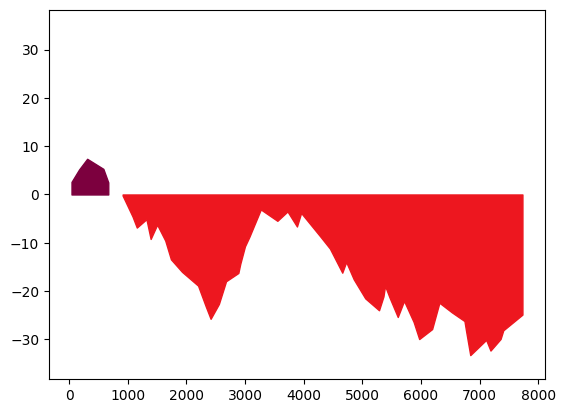

In [73]:
fig, ax = plt.subplots()
create_expected_score_worm_ax(ax, match_scores, match_id)

In [74]:
def plot_expected_score_worm(ax, chain_data, match_id):
    
    match_scores = get_expected_score_worm_data(chain_data, match_id)
    ax = create_expected_score_worm_ax(ax, match_scores, match_id)
    
    return ax

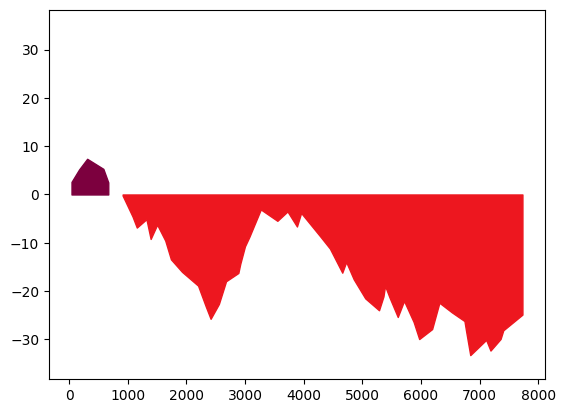

In [75]:
fig, ax = plt.subplots()
ax = plot_expected_score_worm(ax, chains, match_id)

(-38.25853940254696, 38.25853940254696)

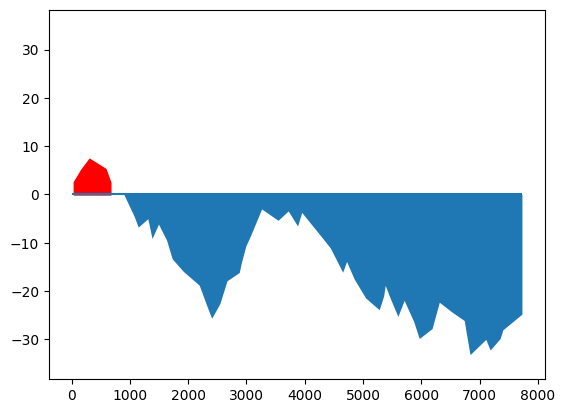

In [55]:
fig, ax = plt.subplots()
# ax.step(match_scores['Duration'], match_scores['cumsum_net_xScore'])
ax.fill_between(match_scores['Duration'], y1=match_scores['cumsum_net_xScore'], where=(match_scores['cumsum_net_xScore'] > 0))
ax.fill_between(match_scores['Duration'], y1=match_scores['cumsum_net_xScore'], where=(match_scores['cumsum_net_xScore'] < 0))
ax.hlines(y=0, xmin=0, xmax=match_scores['Duration'].max())

biggest_lead = abs(match_scores['cumsum_net_xScore']).max()
ax.set_ylim(-biggest_lead-5, biggest_lead+5)

In [ ]:
def plot_cumulative_match_story(home_shots, away_shots, duration_dict, expected=True):
        
    fig = plt.figure()
    ax = plt.subplot(111)

    home_team = get_team(home_shots)
    away_team = get_team(away_shots)
    duration_q1, duration_q2, duration_q3, duration_q4 = duration_dict['duration_q1'], duration_dict['duration_q2'], duration_dict['duration_q3'], duration_dict['duration_q4']

    if expected:
        cumulative = "xScore_cum"
    else:
        cumulative = "Score_cum"
    
    ax.step(home_shots['Duration'], home_shots[cumulative], label = home_team, c=team_colours[home_team]['positive'], zorder=2)
    ax.step(away_shots['Duration'], away_shots[cumulative], label = away_team, c=team_colours[away_team]['positive'], zorder=2)

    # Axes Limits
    ax_top = max(home_shots.iloc[-1][cumulative], away_shots.iloc[-1][cumulative])
    ax.set_ylim(0, ax_top+10)
    ax.set_xlim(0)
    # Quarters
    ax.axvline(duration_q1, c="w", zorder=1, alpha=0.3, ls="--")
    ax.axvline(duration_q1+duration_q2, c="w", zorder=1, alpha=0.3, ls="--")
    ax.axvline(duration_q1+duration_q2+duration_q3, c="w", zorder=1, alpha=0.3, ls="--")
    ax.axvline(duration_q1+duration_q2+duration_q3+duration_q4, c="w", zorder=1, alpha=0.3, ls="--")

    # Legend at end of lines
    ax_text(home_shots.iloc[-1]['Duration']+50, 
            home_shots.iloc[-1][cumulative], 
            s=f"<{round(home_shots.iloc[-1][cumulative], 1)}>",
            highlight_textprops=[
                {'size':'8', 'bbox':{'edgecolor':team_colours[home_team]['positive'], 'facecolor':team_colours[home_team]['positive'], 'pad':1}, 'color':"white"}]
    )
    ax_text(away_shots.iloc[-1]['Duration']+50, 
            away_shots.iloc[-1][cumulative], 
            s=f"<{round(away_shots.iloc[-1][cumulative], 1)}>",
            highlight_textprops=[
                {'size':'8', 'bbox':{'edgecolor':team_colours[away_team]['positive'], 'facecolor':team_colours[away_team]['positive'], 'pad':1}, 'color':"white"}]
    )

    # Title
    fig_text(x=0.15, y=0.95,
            s=f'<{home_team}> v <{away_team}>',
            highlight_textprops=[
                {'size':'16', 'bbox':{'edgecolor':team_colours[home_team]['positive'], 'facecolor':team_colours[home_team]['positive'], 'pad':1}, 'color':"white"},
                {'size':'16', 'bbox':{'edgecolor':team_colours[away_team]['positive'], 'facecolor':team_colours[away_team]['positive'], 'pad':1}, 'color':"white"}],
            size=16,
            font="Karla"
            )

    # Axis Labels
    ax.set_xlabel("Game Duration (Seconds)", font="Karla")
    if expected:
        ax.set_ylabel("Expected Score", font="Karla")
    else:
        ax.set_ylabel("Score", font="Karla")

    return fig, ax